# Projet sur l'analyse de données fonctionnelles

## Importation des bibliothèques

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Chargement et préparation des données 

In [23]:
# Chargement des données
df = pd.read_csv("C:/Users/odjen/Downloads/BAY001 Historische Daten.csv", sep=';')

# Affichage des premières lignes pour vérification
print("Aperçu des données brutes :")
print(df.head())

Aperçu des données brutes :
        Datum Zuletzt Eröffn.   Hoch   Tief     Vol.   +/- %
0  23.02.2025   22,51    22,2   22,6   22,2  869,30K   2,09%
1  16.02.2025   22,05   21,24  22,22  20,98   15,08M   3,16%
2  09.02.2025   21,38   20,97  21,68  20,25   16,77M   2,05%
3  02.02.2025   20,94    21,2  21,41  20,74   13,98M  -3,21%
4  26.01.2025   21,64    20,9  21,97  20,56   18,61M   3,57%


## Nettoyage et conversion des données


In [24]:
# Conversion de la date
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

# Conversion des colonnes numériques
for col in ['Zuletzt', 'Eröffn.', 'Hoch', 'Tief']:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

# Tri des données par date
df = df.sort_values('Datum')

# Vérification des données nettoyées
print("\nAperçu des données nettoyées :")
print(df.head())


Aperçu des données nettoyées :
         Datum  Zuletzt  Eröffn.    Hoch    Tief    Vol.   +/- %
526 2015-01-25   126.01   125.13  128.82  124.73  11,44M  -0,04%
525 2015-02-01   123.26   126.01  129.61  121.93  11,40M  -2,18%
524 2015-02-08   124.44   122.13  125.87  118.78  11,35M   0,96%
523 2015-02-15   122.52   124.54  124.73  121.58  10,42M  -1,54%
522 2015-02-22   129.95   124.19  131.03  123.80  10,67M   6,06%


## Visualisation de base


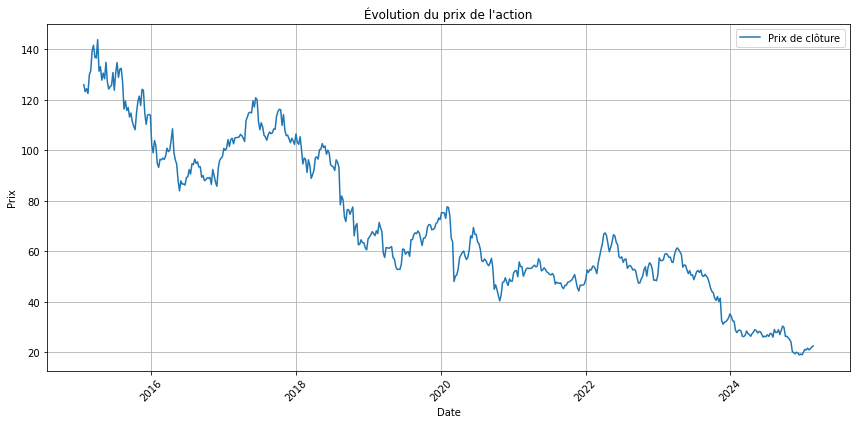

In [25]:
# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(df['Datum'], df['Zuletzt'], label='Prix de clôture')
plt.title('Évolution du prix de l\'action')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Statistiques descriptives


In [26]:
# Calcul des statistiques de base
print("\nStatistiques descriptives :")
print(df[['Zuletzt', 'Eröffn.', 'Hoch', 'Tief']].describe())

# Calcul des rendements journaliers
df['Rendement'] = df['Zuletzt'].pct_change()

# Affichage des statistiques des rendements
print("\nStatistiques des rendements :")
print(df['Rendement'].describe())


Statistiques descriptives :
          Zuletzt     Eröffn.        Hoch        Tief
count  527.000000  527.000000  527.000000  527.000000
mean    70.642619   70.837666   72.637324   68.794858
std     30.066820   30.062480   30.684984   29.363569
min     18.940000   18.820000   19.330000   18.410000
25%     50.410000   50.615000   52.480000   49.510000
50%     61.540000   61.610000   64.370000   60.050000
75%     96.555000   97.195000   98.505000   94.235000
max    143.870000  143.970000  144.120000  138.710000

Statistiques des rendements :
count    526.000000
mean      -0.002355
std        0.042120
min       -0.246629
25%       -0.022652
50%       -0.001123
75%        0.021393
max        0.135707
Name: Rendement, dtype: float64


## Analyse des valeurs aberrantes 


Statistiques des variations de prix :
Q1: -2.27%
Médiane: -0.11%
Q3: 2.14%
Limite inférieure: -8.87%
Limite supérieure: 8.75%

Nombre de valeurs aberrantes: 19


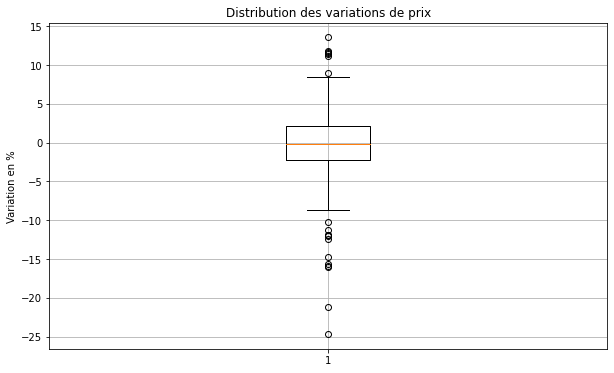

In [28]:
# Calcul des variations de prix quotidiennes en pourcentage
df['Variation_Prix'] = df['Zuletzt'].pct_change() * 100

# Calcul des statistiques pour détecter les valeurs aberrantes
Q1 = df['Variation_Prix'].quantile(0.25)
Q3 = df['Variation_Prix'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes
outliers = df[(df['Variation_Prix'] < lower_bound) | (df['Variation_Prix'] > upper_bound)]

print("Statistiques des variations de prix :")
print(f"Q1: {Q1:.2f}%")
print(f"Médiane: {df['Variation_Prix'].median():.2f}%")
print(f"Q3: {Q3:.2f}%")
print(f"Limite inférieure: {lower_bound:.2f}%")
print(f"Limite supérieure: {upper_bound:.2f}%")
print(f"\nNombre de valeurs aberrantes: {len(outliers)}")

# Visualisation avec boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Variation_Prix'].dropna())
plt.title('Distribution des variations de prix')
plt.ylabel('Variation en %')
plt.grid(True)
plt.show()

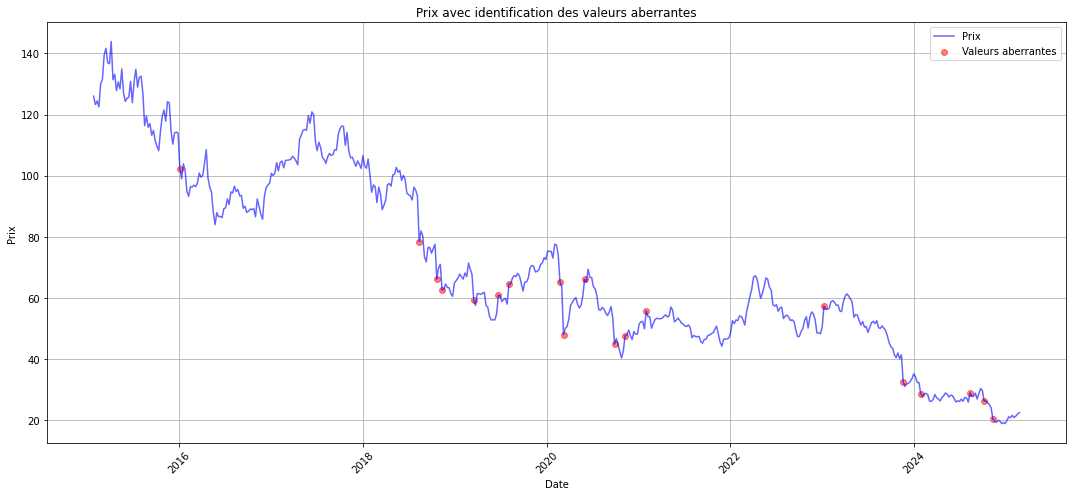

In [29]:
# Création d'un graphique montrant les prix avec les valeurs aberrantes en surbrillance
plt.figure(figsize=(15, 7))
plt.plot(df['Datum'], df['Zuletzt'], label='Prix', color='blue', alpha=0.6)
plt.scatter(outliers['Datum'], outliers['Zuletzt'], 
           color='red', label='Valeurs aberrantes', alpha=0.5)
plt.title('Prix avec identification des valeurs aberrantes')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

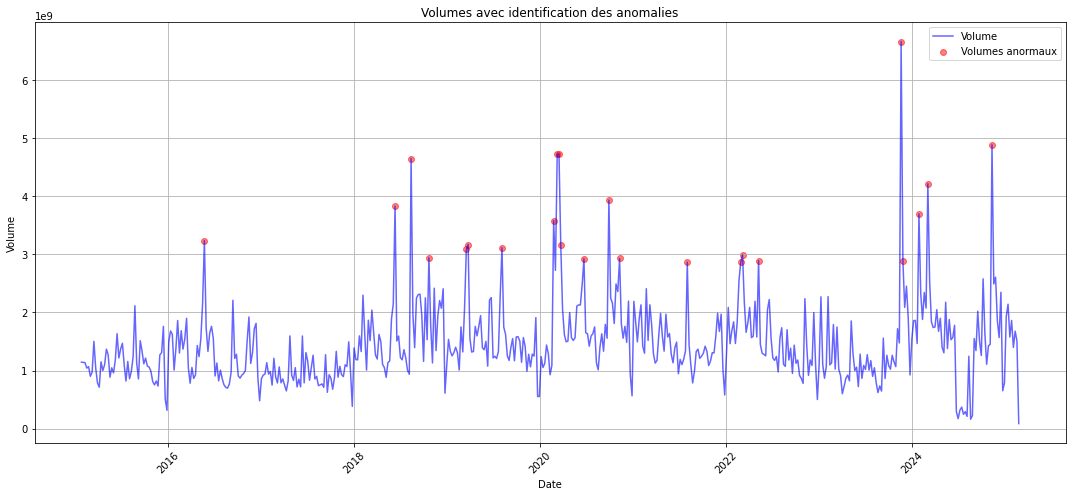

In [30]:
# Nettoyage de la colonne Volume
df['Volume_Clean'] = df['Vol.'].str.replace('M', '000000').str.replace('K', '000').str.replace(',', '').astype(float)

# Détection des volumes anormaux
Q1_vol = df['Volume_Clean'].quantile(0.25)
Q3_vol = df['Volume_Clean'].quantile(0.75)
IQR_vol = Q3_vol - Q1_vol
lower_bound_vol = Q1_vol - 1.5 * IQR_vol
upper_bound_vol = Q3_vol + 1.5 * IQR_vol

volume_outliers = df[(df['Volume_Clean'] < lower_bound_vol) | (df['Volume_Clean'] > upper_bound_vol)]

# Visualisation des volumes avec identification des anomalies
plt.figure(figsize=(15, 7))
plt.plot(df['Datum'], df['Volume_Clean'], label='Volume', color='blue', alpha=0.6)
plt.scatter(volume_outliers['Datum'], volume_outliers['Volume_Clean'],
           color='red', label='Volumes anormaux', alpha=0.5)
plt.title('Volumes avec identification des anomalies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Matrice de corrélation :
                Zuletzt  Eröffn.  Hoch  Tief  Volume_Clean  Variation_Prix
Zuletzt            1.00     1.00  1.00  1.00         -0.29            0.07
Eröffn.            1.00     1.00  1.00  1.00         -0.28           -0.02
Hoch               1.00     1.00  1.00  1.00         -0.26            0.02
Tief               1.00     1.00  1.00  1.00         -0.30            0.04
Volume_Clean      -0.29    -0.28 -0.26 -0.30          1.00           -0.27
Variation_Prix     0.07    -0.02  0.02  0.04         -0.27            1.00


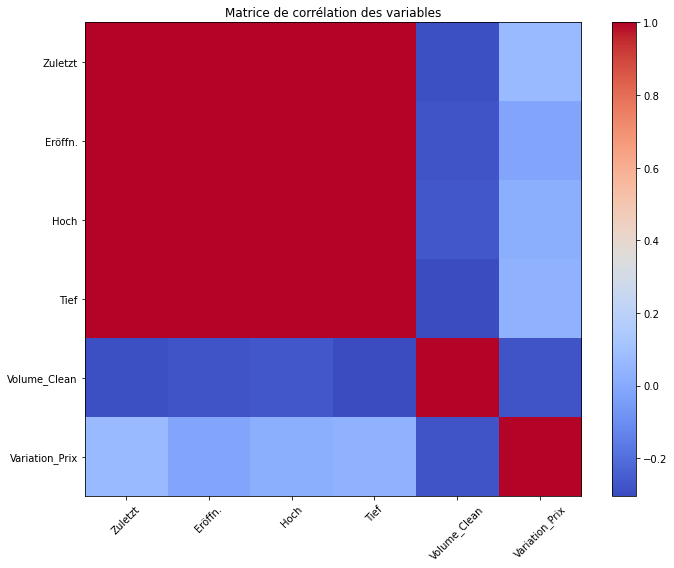

In [31]:
# Calcul de la matrice de corrélation
correlation_matrix = df[['Zuletzt', 'Eröffn.', 'Hoch', 'Tief', 'Volume_Clean', 'Variation_Prix']].corr()

# Affichage de la matrice de corrélation
print("\nMatrice de corrélation :")
print(correlation_matrix.round(2))

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de corrélation des variables')
plt.tight_layout()
plt.show()

## Analyse de la volatilité

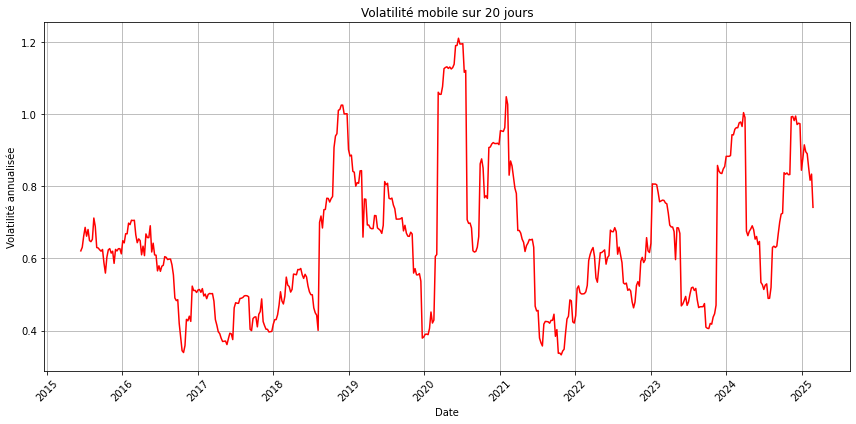

In [27]:
# Calcul de la volatilité sur une fenêtre mobile de 20 jours
df['Volatilité'] = df['Rendement'].rolling(window=20).std() * np.sqrt(252)

# Visualisation de la volatilité
plt.figure(figsize=(12, 6))
plt.plot(df['Datum'], df['Volatilité'], color='red')
plt.title('Volatilité mobile sur 20 jours')
plt.xlabel('Date')
plt.ylabel('Volatilité annualisée')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modélisation des courbes

### Lissage avec B-splines

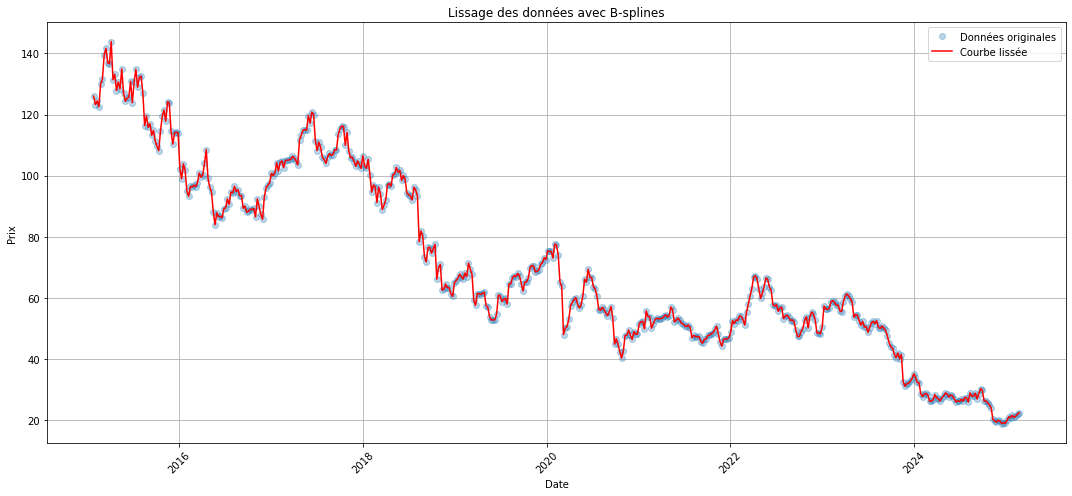

In [32]:
from scipy.interpolate import splrep, BSpline
import numpy as np

# Création d'une échelle de temps normalisée
time_scale = np.arange(len(df))
normalized_time = (time_scale - time_scale.min()) / (time_scale.max() - time_scale.min())

# Lissage avec B-splines
spl = splrep(normalized_time, df['Zuletzt'].values, k=3)  # k=3 pour une spline cubique
smooth_curve = BSpline(*spl)(normalized_time)

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(df['Datum'], df['Zuletzt'], 'o', label='Données originales', alpha=0.3)
plt.plot(df['Datum'], smooth_curve, 'r-', label='Courbe lissée')
plt.title('Lissage des données avec B-splines')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Décomposition en tendance et cycles

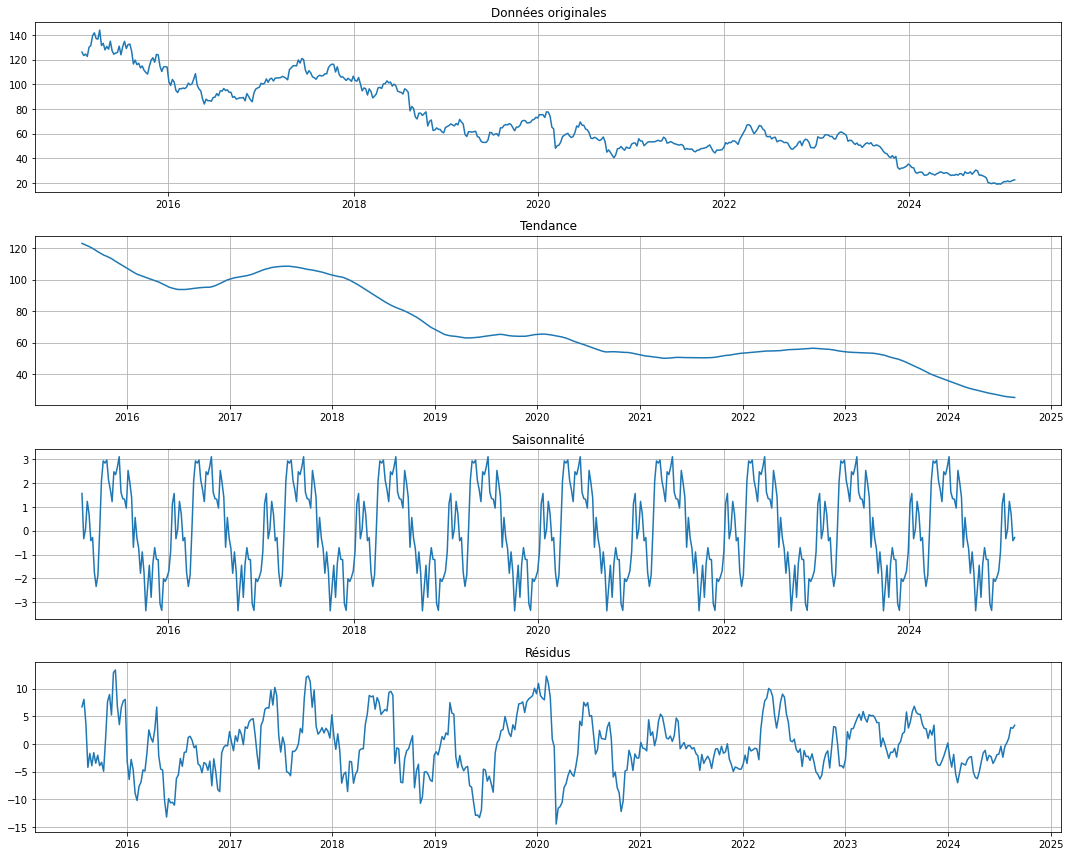

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Conversion de l'index en DateTimeIndex
df_temp = df.copy()
df_temp.set_index('Datum', inplace=True)

# Décomposition de la série temporelle
decomposition = seasonal_decompose(df_temp['Zuletzt'], period=52)  # 52 semaines pour une année

# Visualisation de la décomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

ax1.plot(df_temp.index, df_temp['Zuletzt'])
ax1.set_title('Données originales')
ax1.grid(True)

ax2.plot(df_temp.index, decomposition.trend)
ax2.set_title('Tendance')
ax2.grid(True)

ax3.plot(df_temp.index, decomposition.seasonal)
ax3.set_title('Saisonnalité')
ax3.grid(True)

ax4.plot(df_temp.index, decomposition.resid)
ax4.set_title('Résidus')
ax4.grid(True)

plt.tight_layout()
plt.show()

### Modélisation non linéaire avec différentes fonctions

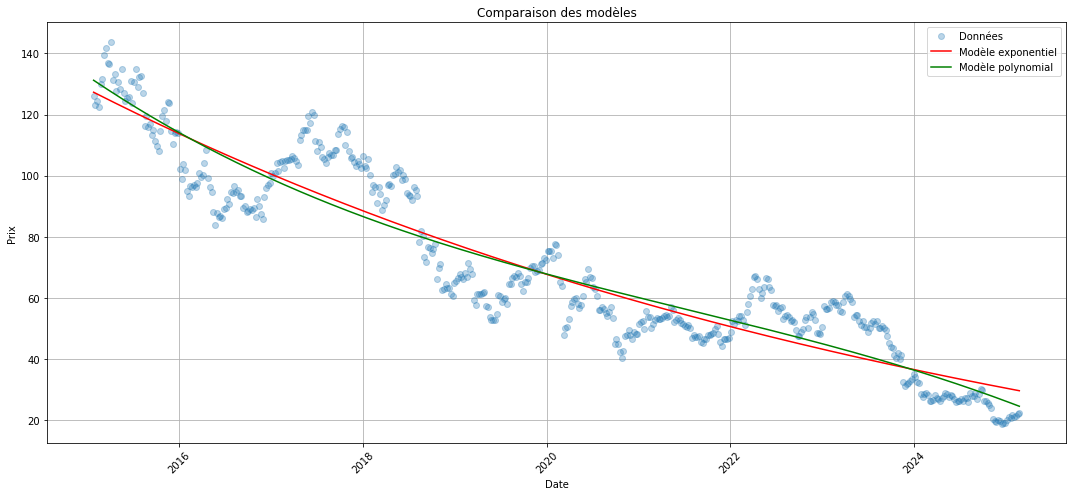

In [34]:
from scipy.optimize import curve_fit

# Définition de différents modèles
def modele_exponentiel(x, a, b, c):
    return a * np.exp(b * x) + c

def modele_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Ajustement des modèles
time_numeric = np.arange(len(df))

# Modèle exponentiel
popt_exp, _ = curve_fit(modele_exponentiel, time_numeric, df['Zuletzt'].values, 
                       p0=[1, 0.001, 1])
y_exp = modele_exponentiel(time_numeric, *popt_exp)

# Modèle polynomial
popt_poly, _ = curve_fit(modele_polynomial, time_numeric, df['Zuletzt'].values)
y_poly = modele_polynomial(time_numeric, *popt_poly)

# Visualisation des modèles
plt.figure(figsize=(15, 7))
plt.plot(df['Datum'], df['Zuletzt'], 'o', label='Données', alpha=0.3)
plt.plot(df['Datum'], y_exp, 'r-', label='Modèle exponentiel')
plt.plot(df['Datum'], y_poly, 'g-', label='Modèle polynomial')
plt.title('Comparaison des modèles')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Évaluation des modèles

In [35]:
# Calcul des erreurs pour chaque modèle
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Métriques pour le modèle exponentiel
metrics_exp = calculate_metrics(df['Zuletzt'].values, y_exp)
print("\nMétriques pour le modèle exponentiel:")
for metric, value in metrics_exp.items():
    print(f"{metric}: {value:.4f}")

# Métriques pour le modèle polynomial
metrics_poly = calculate_metrics(df['Zuletzt'].values, y_poly)
print("\nMétriques pour le modèle polynomial:")
for metric, value in metrics_poly.items():
    print(f"{metric}: {value:.4f}")


Métriques pour le modèle exponentiel:
MSE: 117.8475
RMSE: 10.8558
MAE: 9.3022

Métriques pour le modèle polynomial:
MSE: 114.7551
RMSE: 10.7124
MAE: 9.0132


## Analyse du prix par clustering

Nombre de valeurs manquantes par colonne :
Zuletzt          0
Volume_Clean     0
Volatilité      20
dtype: int64


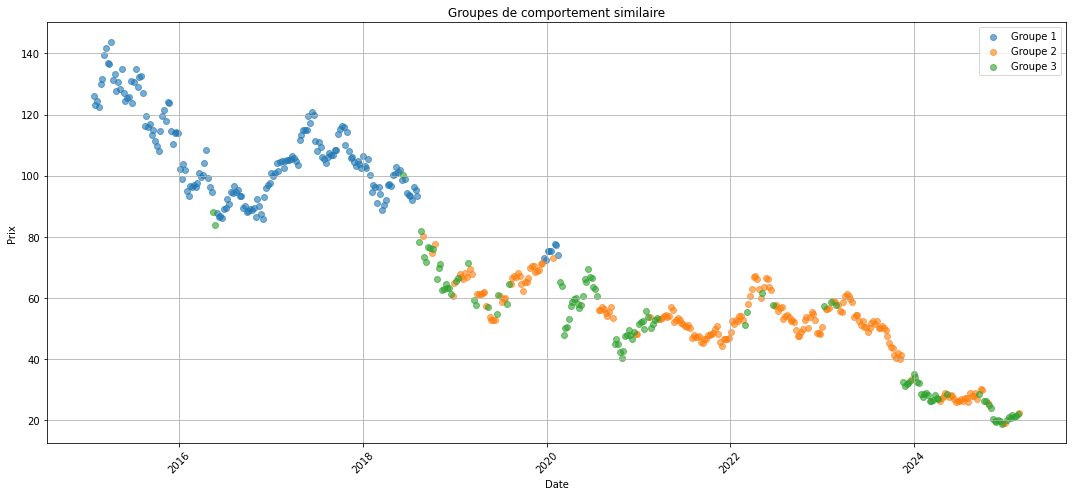


Caractéristiques des groupes identifiés :
        Zuletzt         Volume_Clean Volatilité
           mean    std          mean       mean
Cluster                                        
0        105.50  14.82  1.142032e+09       0.54
1         52.09  12.14  1.276532e+09       0.60
2         48.97  18.47  2.261874e+09       0.90


In [39]:
# Préparation des données pour le clustering
features = ['Zuletzt', 'Volume_Clean', 'Volatilité'] 

# 1. D'abord, vérifions les valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(df[features].isnull().sum())

# 2. Créons un DataFrame temporaire pour le clustering
df_cluster = df.copy()

# 3. Gérons les valeurs manquantes (par exemple, en les remplaçant par la moyenne)
for feature in features:
    df_cluster[feature].fillna(df_cluster[feature].mean(), inplace=True)

# 4. Normalisation
X = df_cluster[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Application du K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Visualisation des clusters
plt.figure(figsize=(15, 7))
for i in range(n_clusters):
    cluster_data = df_cluster[df_cluster['Cluster'] == i]
    plt.scatter(cluster_data['Datum'], cluster_data['Zuletzt'], 
               label=f'Groupe {i+1}', alpha=0.6)
plt.title('Groupes de comportement similaire')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Affichage des statistiques par cluster
print("\nCaractéristiques des groupes identifiés :")
cluster_stats = df_cluster.groupby('Cluster').agg({
    'Zuletzt': ['mean', 'std'],
    'Volume_Clean': 'mean',
    'Volatilité': 'mean'
}).round(2)
print(cluster_stats)